# "Stat Trick"

# Load Data/Packages

In [93]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
import math

# modeling routines from Scikit Learn packages
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score
from math import sqrt  # for root mean-squared error calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
engine=create_engine('sqlite:///shots.db')

In [3]:
shots_df = pd.read_sql_table('shots', engine)

In [4]:
shots_df.columns

Index(['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event', 'Description',
       'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type',
       'Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID',
       'p2_name', 'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC', 'Home_Coach', 'Away_Coach',
       'Year', 'prev_event', 'prev_seconds_elapsed', 'prev_xC', 'prev_yC'],
      dtype='object')

In [5]:
shots_df.tail()

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach,Year,prev_event,prev_seconds_elapsed,prev_xC,prev_yC
1300006,410434,30417,2011-06-15,2,BLOCK,BOS #21 FERENCE BLOCKED BY VAN #10 TAMBELLINI...,9:33,573.0,5x5,Def,...,8466141.0,61.0,7.0,ALAIN VIGNEAULT,CLAUDE JULIEN,2010,HIT,572.0,96.0,-2.0
1300007,410534,30417,2011-06-15,3,SHOT,"VAN ONGOAL - #3 BIEKSA, Wrist, Off. Zone, 49 ft.",9:35,575.0,5x5,Off,...,8466141.0,57.0,-37.0,ALAIN VIGNEAULT,CLAUDE JULIEN,2010,BLOCK,573.0,61.0,7.0
1300008,432294,30417,2019-06-12,3,MISS,"BOS #73 MCAVOY, Wrist, Wide of Net, Off. Zone,...",9:39,579.0,5x5,Off,...,8471695.0,34.0,3.0,BRUCE CASSIDY,CRAIG BERUBE,2018,HIT,579.0,89.0,33.0
1300009,432295,30417,2019-06-12,3,BLOCK,"BOS #47 KRUG BLOCKED BY STL #29 DUNN, Slap, D...",9:47,587.0,5x5,Def,...,8471695.0,61.0,11.0,BRUCE CASSIDY,CRAIG BERUBE,2018,HIT,580.0,-19.0,39.0
1300010,432098,30417,2019-06-12,1,SHOT,"BOS ONGOAL - #46 KREJCI, Backhand, Off. Zone, ...",9:49,589.0,5x4,Off,...,8471695.0,78.0,1.0,BRUCE CASSIDY,CRAIG BERUBE,2018,HIT,588.0,-82.0,-38.0


In [6]:
engine1=create_engine('sqlite:///hits.db')

In [7]:
hits_df = pd.read_sql_table('hits', engine1)

In [8]:
engine2=create_engine('sqlite:///nhl_shift_data.db')

In [9]:
shift_df = pd.read_sql_table('nhl_shift_data',engine2)

In [10]:
shift_df.head()

,Unnamed: 0,Game_Id,Period,Team,Player,Player_Id,Start,End,Duration,Date,Year,Shift_Count
0,0,20001,1,WSH,TOM POTI,8465012.0,0.0,34.0,34.0,2009-10-01,2009,1
1,1,20001,1,WSH,BRENDAN MORRISON,8459461.0,0.0,45.0,45.0,2009-10-01,2009,1
2,2,20001,1,WSH,BROOKS LAICH,8469639.0,0.0,45.0,45.0,2009-10-01,2009,1
3,3,20001,1,WSH,MIKE KNUBLE,8458590.0,0.0,45.0,45.0,2009-10-01,2009,1
4,4,20001,1,WSH,MILAN JURCINA,8469684.0,0.0,34.0,34.0,2009-10-01,2009,1


In [11]:
engine_join=create_engine('sqlite:///nhl_shot_shift_join_data.db')

In [12]:
shot_shift_df = pd.read_sql_table('nhl_shot_shift_join_data',engine_join)

In [13]:
shot_shift_df.tail()

,Game_Id,Period,Event,Seconds_Elapsed,Strength,Type,p1_ID,xC,yC,Year_x,...,prev_xC,prev_yC,Player_Id,Start,End,Shift_Count,Year_y,p1_ID_shift,p1_ID_Time_In_Shift,p1_ID_shift_duration
2149857,30416,2,SHOT,582.0,4x4,SNAP SHOT,8467346,67.0,-24.0,2009,...,34.0,33.0,8467346,569.0,598.0,1892.0,2009,1892.0,13.0,29.0
2149858,30416,3,SHOT,584.0,5x5,WRIST SHOT,8466148,63.0,33.0,2009,...,0.0,0.0,8466148,573.0,618.0,1949.0,2009,1949.0,11.0,45.0
2149859,30416,3,SHOT,584.0,5x5,WRIST SHOT,8466148,63.0,33.0,2009,...,0.0,0.0,8466148,560.0,596.0,1969.0,2009,1969.0,24.0,36.0
2149860,30416,2,GOAL,598.0,4x4,WRIST SHOT,8469544,-75.0,16.0,2009,...,3.0,38.0,8469544,569.0,598.0,2419.0,2009,2419.0,29.0,29.0
2149861,30416,2,GOAL,598.0,4x4,WRIST SHOT,8469544,-75.0,16.0,2009,...,3.0,38.0,8469544,582.0,633.0,2431.0,2009,2431.0,16.0,51.0


# Shot Selection Analytics 

In [14]:
shot_type = shots_df.groupby('Type').count()
#shot_type[1]
shot_type = shot_type['Game_Id']
shot_type

Type
BACKHAND        85136
DEFLECTED       21077
SLAP SHOT      284373
SNAP SHOT      179210
TIP-IN          59347
WRAP-AROUND     10707
WRIST SHOT     660055
Name: Game_Id, dtype: int64

We can see that Wrist Shots encompass a majority of shots in the NHL, followed by Slap Shot. 
Anything up close seems to less likely to be used; let's see what type has the best success rate

In [15]:
shots_df['Shot_Success'] = np.where(shots_df['Event']=='GOAL', 1, 0)

In [16]:
shot_success = shots_df.groupby(['Type'])['Shot_Success'].sum().sort_values(ascending=False)
shot_success

#groupby(['neighborhood'])['crim'].count().sort_values(ascending=False)

Type
WRIST SHOT     32710
SNAP SHOT       9569
SLAP SHOT       7788
BACKHAND        6892
TIP-IN          6080
DEFLECTED       1955
WRAP-AROUND      492
Name: Shot_Success, dtype: int64

In [17]:
frames = [shot_type,shot_success]
shot_ratio = pd.concat(frames,axis=1,join="outer")
#shot_ratioloc[ : , ['Index', 'Shot_Success'] ]
shot_ratio["%"] = shot_ratio['Shot_Success'] / shot_ratio['Game_Id']
shot_ratio = shot_ratio.rename(columns={"Game_Id": "Total_Shot_Counts","Shot_Success": "Goals"})
#shot_ratio.sort_values(by='%', ascending=False)

In [18]:
shot_ratio.sort_values(by='%', ascending=False)

,Total_Shot_Counts,Goals,%
TIP-IN,59347,6080,0.102448
DEFLECTED,21077,1955,0.092755
BACKHAND,85136,6892,0.080953
SNAP SHOT,179210,9569,0.053395
WRIST SHOT,660055,32710,0.049556
WRAP-AROUND,10707,492,0.045951
SLAP SHOT,284373,7788,0.027387


Anything short distance has a higher success rates. It's interesting that Slap shots have the 2nd highest volume of shots attempt but the lowest considerably success rate to scoring goals. Let's see if we heat mapped the location of shots if we see any noticeable trends

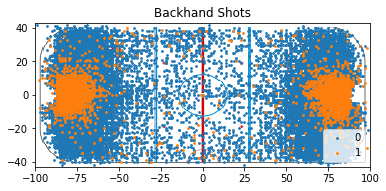

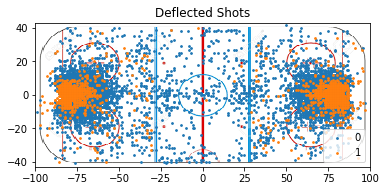

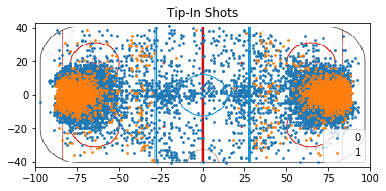

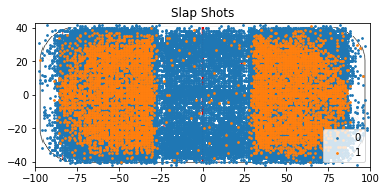

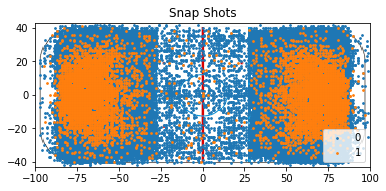

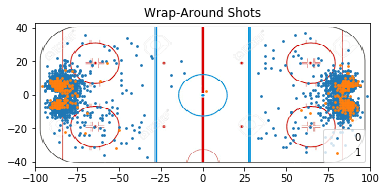

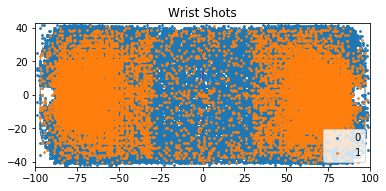

In [19]:
backhand=shots_df[shots_df['Type']=='BACKHAND']
x_coords = backhand['xC']
y_coords = backhand['yC']
groups = backhand.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Backhand Shots')
plt.show()

deflected=shots_df[shots_df['Type']=='DEFLECTED']
x_coords = deflected['xC']
y_coords = deflected['yC']
groups = deflected.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Deflected Shots')
plt.show()

tipin=shots_df[shots_df['Type']=='TIP-IN']
x_coords = tipin['xC']
y_coords = tipin['yC']
groups = tipin.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Tip-In Shots')
plt.show()

slapshot=shots_df[shots_df['Type']=='SLAP SHOT']
x_coords = slapshot['xC']
y_coords = slapshot['yC']
groups = slapshot.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Slap Shots')
plt.show()


snapshot=shots_df[shots_df['Type']=='SNAP SHOT']
x_coords = snapshot['xC']
y_coords = snapshot['yC']
groups = snapshot.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Snap Shots')
plt.show()

wraparound=shots_df[shots_df['Type']=='WRAP-AROUND']
x_coords = wraparound['xC']
y_coords = wraparound['yC']
groups = wraparound.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Wrap-Around Shots')
plt.show()

wristshot=shots_df[shots_df['Type']=='WRIST SHOT']
x_coords = wristshot['xC']
y_coords = wristshot['yC']
groups = wristshot.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Wrist Shots')
plt.show()

What's interesting is the higher degree of success of snap shots versus slap shots. I'd imagined if players were positioned correctly they would increase the success rate of those shots. We'll dive into that next. 

To model, we are going to need to know the distance a shot was taken to show range of success by location. In research conducted by Ken Krzywicki in June 2010 called "NHL Shot Quality 2009-10". He modeled distance as:

Distance = sqrt((89 - abs(x))^2+y^2)

This may look familiar b/c this is the Pythareogan theorem (rudimentary pre-calc/trignometry)

We'll also attempt to calculate the angle to which the shot was taken, using the following mathematical formula:
Angle (Degrees) = Sin(Theta) = ((y/Distance)* 180)/pi

Any negative degrees will be consider right wing, whereas positive will be considered left wing. 

Reference:
http://hockeyanalytics.com/Research_files/SQ-RS0910-Krzywicki.pdf
https://rstudio-pubs-static.s3.amazonaws.com/311470_f6e88d4842da46e9941cc6547405a051.html

In [20]:
#shots_df['Shot_Success'] = np.where(shots_df['Event']=='GOAL', 1, 0)
#shots_df.groupby('Ev_Zone').count()
shots_df['xC'] = shots_df['xC'].fillna(0)
shots_df['xC'] = shots_df['xC'].astype(int)
shots_df['yC'] = shots_df['yC'].fillna(0)
shots_df['yC'] = shots_df['yC'].astype(int)
shots_df['Distance'] = np.sqrt((89 - np.abs(shots_df['xC']))**2+shots_df['yC']**2)                                  

In [21]:
shots_df['Shot_Angle'] = np.arcsin(shots_df['yC']/shots_df['Distance'])

In [22]:
shots_df['Shot_Angle'] = shots_df['Shot_Angle'] * 180

In [23]:
shots_df['Shot_Angle'] = shots_df['Shot_Angle'] / np.pi

In [24]:
##### anything w/ negative degrees is assumed to be right wing & positive is left wing
shots_df['Wing_Side'] = np.where(shots_df['Shot_Angle'] < 0, "Right Wing", "Left Wing")

In [27]:
shots_df['Shot_Angle'].describe()

count    1.300007e+06
mean    -6.184607e-01
std      3.474329e+01
min     -9.000000e+01
25%     -2.703086e+01
50%      0.000000e+00
75%      2.656505e+01
max      9.000000e+01
Name: Shot_Angle, dtype: float64

Okay, we've looked at positioning, distance, the angle, type of shot, we'll pull in seconds elapsed, & strength to create two machine learning/predictive models:
-Goal Success
-Winning Percentage

From there we hope to gain greater insights into how teams have faired. 
-We'll pull out a key game to highlight how shooting quality effected games success

Limitiations of our dataset: To complete our physics lesson, a limitaiton of our analysis is missing shot velocity, 

Show visual of probability of shots in visual based on shot selection

In [28]:
#shots_df.head()

### this will show seconds since last major event 

shots_df['Seconds_since_prev_event'] = shots_df['Seconds_Elapsed'] - shots_df['prev_seconds_elapsed']


### Distance from previous spot ###
### Angle from previous spots ###

In [29]:
# Let's also calculate distance from previous spots, whihc would be interesting to see if goal scores originated
#from farther out  or closer to the goal #
shots_df['prev_xC'] = shots_df['prev_xC'].fillna(0)
shots_df['prev_xC'] = shots_df['prev_xC'].astype(int)
shots_df['prev_yC'] = shots_df['prev_yC'].fillna(0)
shots_df['prev_yC'] = shots_df['prev_yC'].astype(int)
shots_df['prev_Distance'] = np.sqrt((89 - np.abs(shots_df['prev_xC']))**2+shots_df['prev_yC']**2)  

In [30]:
shots_df['prev_Angle_to_net'] = np.arcsin(shots_df['prev_yC']/shots_df['prev_Distance'])

In [31]:
shots_df['prev_Angle_to_net'] = shots_df['prev_Angle_to_net'] * 180

In [32]:
shots_df['prev_Angle_to_net'] = shots_df['prev_Angle_to_net'] / np.pi

In [33]:
shots_df['prev_Wing_Side'] = np.where(shots_df['prev_Angle_to_net'] < 0, "Right Wing", "Left Wing")

In [34]:
shots_df.columns

Index(['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event', 'Description',
       'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type',
       'Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID',
       'p2_name', 'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC', 'Home_Coach', 'Away_Coach',
       'Year', 'prev_event', 'prev_seconds_elapsed', 'prev_xC', 'prev_yC',
       'Shot_Success', 'Distance', '

# Period Shot Analysis

In [194]:
period_shot_type = shots_df.groupby(['Period']).count()
#shot_type[1]
period_shot_type = period_shot_type['Game_Id'].sort_values(ascending=False)
period_shot_type

Period
2    438412
1    418806
3    410979
4     22596
5      9087
6       131
Name: Game_Id, dtype: int64

In [179]:
most_goals_by_period = shots_df.groupby(['Period'])['Shot_Success'].sum().sort_values(ascending=False)
most_goals_by_period

Period
2    21589
3    21576
1    18208
5     2701
4     1466
6        6
Name: Shot_Success, dtype: int64

In [195]:
p_frames = [period_shot_type,most_goals_by_period]
period_shot_ratio = pd.concat(p_frames,axis=1,join="outer")
#shot_ratioloc[ : , ['Index', 'Shot_Success'] ]
period_shot_ratio["%"] = period_shot_ratio['Shot_Success'] / period_shot_ratio['Game_Id']
period_shot_ratio = period_shot_ratio.rename(columns={"Game_Id": "Total_Shot_Counts","Shot_Success": "Goals"})
#shot_ratio.sort_values(by='%', ascending=False)

In [197]:
period_shot_ratio.nlargest(20,['Total_Shot_Counts']).sort_values(by='Total_Shot_Counts', ascending=False)

,Total_Shot_Counts,Goals,%
Period,,,
2,438412,21589,0.049244
1,418806,18208,0.043476
3,410979,21576,0.052499
4,22596,1466,0.064879
5,9087,2701,0.297238
6,131,6,0.045802


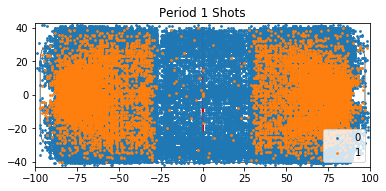

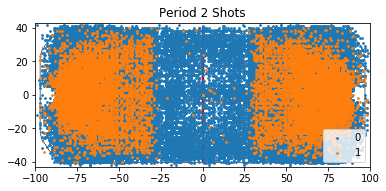

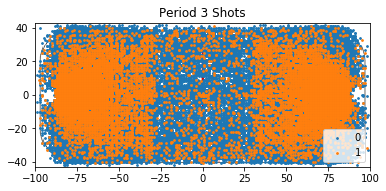

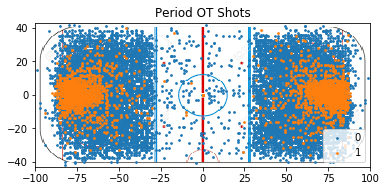

In [202]:
period1=shots_df[shots_df['Period']==1]
x_coords = period1['xC']
y_coords = period1['yC']
groups = period1.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Period 1 Shots')
plt.show()

period2=shots_df[shots_df['Period']==2]
x_coords = period2['xC']
y_coords = period2['yC']
groups = period2.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Period 2 Shots')
plt.show()

period3=shots_df[shots_df['Period']==3]
x_coords = period3['xC']
y_coords = period3['yC']
groups = period3.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Period 3 Shots')
plt.show()

period_ot=shots_df[shots_df['Period']>3]
x_coords = period_ot['xC']
y_coords = period_ot['yC']
groups = period_ot.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Period OT Shots')
plt.show()


No visual difference between Period 1/2. Period 3 has more in the center due to open net (most likely). It appears Period OT shots success is more confined to the middle

# Strength Shot Analysis

In [198]:
strength_shot_type = shots_df.groupby(['Strength']).count()
#shot_type[1]
strength_shot_type = strength_shot_type['Game_Id'].sort_values(ascending=False)
strength_shot_type

Strength
5x5     1029435
5x4      113858
4x5      101672
4x4       28263
0x0        8635
3x3        6516
5x3        3863
3x5        3328
4x3        2151
3x4        1905
1x0         119
0x1         110
5x6          48
6x5          32
4x1          17
1x1          13
1x5          12
5x1          11
5x0           3
5x7           3
0x5           3
6x6           3
2x5           2
6x4           2
8x5           1
3x2           1
7x5           1
5x10          1
5x8           1
6x1           1
4x6           1
Name: Game_Id, dtype: int64

In [181]:
most_goals_strength = shots_df.groupby(['Strength'])['Shot_Success'].sum().sort_values(ascending=False)
most_goals_strength

Strength
5x5     45141
5x4      7649
4x5      6621
0x0      2761
4x4      1440
3x3       626
5x3       470
3x5       399
4x3       202
3x4       165
1x0        36
0x1        31
4x1         5
1x1         0
1x5         0
2x5         0
3x2         0
0x5         0
8x5         0
7x5         0
5x0         0
5x1         0
5x10        0
5x6         0
5x7         0
5x8         0
6x1         0
6x4         0
6x5         0
6x6         0
4x6         0
Name: Shot_Success, dtype: int64

In [199]:
p_frames = [strength_shot_type,most_goals_strength]
strength_shot_ratio = pd.concat(p_frames,axis=1,join="outer")
#shot_ratioloc[ : , ['Index', 'Shot_Success'] ]
strength_shot_ratio["%"] = strength_shot_ratio['Shot_Success'] / strength_shot_ratio['Game_Id']
strength_shot_ratio = strength_shot_ratio.rename(columns={"Game_Id": "Total_Shot_Counts","Shot_Success": "Goals"})
#shot_ratio.sort_values(by='%', ascending=False)

In [201]:
strength_shot_ratio.nlargest(20,['Total_Shot_Counts']).sort_values(by='Total_Shot_Counts', ascending=False)

,Total_Shot_Counts,Goals,%
5x5,1029435,45141,0.043850
5x4,113858,7649,0.067180
4x5,101672,6621,0.065121
4x4,28263,1440,0.050950
0x0,8635,2761,0.319745
3x3,6516,626,0.096071
5x3,3863,470,0.121667
3x5,3328,399,0.119892
4x3,2151,202,0.093910
3x4,1905,165,0.086614


In [208]:
even_strength = ['5x5','4x4','3x3']
power_play = ['5x4','5x3','4x3','6x5','1x0','6x5','4x1','5x1','5x0']
deficit = ['4x5','3x5','3x4','0x1','5x6','1x5','5x7']
penalty_sht = ['0x0']
even_strength_df = shots_df[shots_df.Strength.isin(even_strength)]
power_play_df = shots_df[shots_df.Strength.isin(power_play)]
deficit_play_df = shots_df[shots_df.Strength.isin(deficit)]
penalty_play_df = shots_df[shots_df.Strength.isin(penalty_sht)]

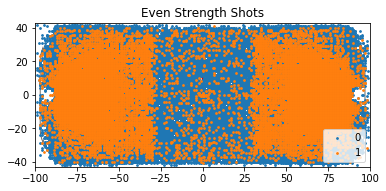

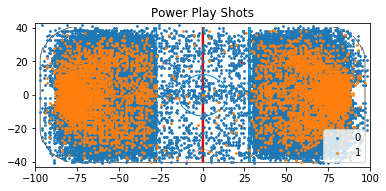

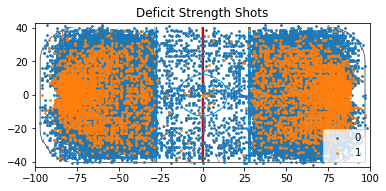

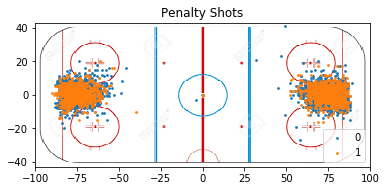

In [239]:
x_coords = even_strength_df['xC']
y_coords = even_strength_df['yC']
groups = even_strength_df.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Even Strength Shots')
plt.show()

x_coords = power_play_df['xC']
y_coords = power_play_df['yC']
groups = power_play_df.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Power Play Shots')
plt.show()


x_coords = deficit_play_df['xC']
y_coords = deficit_play_df['yC']
groups = deficit_play_df.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Deficit Strength Shots')
plt.show()


x_coords = penalty_play_df['xC']
y_coords = penalty_play_df['yC']
groups = penalty_play_df.groupby('Shot_Success')
colors = {'0':'light blue', '1':'orange'}

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Penalty Shots')
plt.show()

# Top Player Shot Type

In [188]:
player_shot_type = shots_df.groupby(['p1_ID','p1_name']).count()
#shot_type[1]
player_shot_type = player_shot_type['Game_Id'].sort_values(ascending=False)
player_shot_type

p1_ID      p1_name      
8471214.0  ALEX OVECHKIN    5474
8470613.0  BRENT BURNS      4552
8470794.0  JOE PAVELSKI     4061
8470642.0  SHEA WEBER       3913
8474578.0  ERIK KARLSSON    3861
                            ... 
8479402.0  JAKE BEAN           1
8471728.0  BRODIE DUPONT       1
8471469.0  PEKKA RINNE         1
8471711.0  SCOTT JACKSON       1
8474550.0  ANTTI NIEMI         1
Name: Game_Id, Length: 2085, dtype: int64

In [180]:
most_goals = shots_df.groupby(['p1_ID','p1_name'])['Shot_Success'].sum().sort_values(ascending=False)
most_goals

p1_ID      p1_name       
8471214.0  ALEX OVECHKIN     457
8474564.0  STEVEN STAMKOS    373
8474141.0  PATRICK KANE      343
8471675.0  SIDNEY CROSBY     342
8475166.0  JOHN TAVARES      323
                            ... 
8470704.0  JAMIE TARDIF        0
8476772.0  BRIAN O'NEILL       0
8476798.0  KARL STOLLERY       0
8470671.0  DANNY IRMEN         0
8481486.0  JIMMY SCHULDT       0
Name: Shot_Success, Length: 2085, dtype: int64

In [189]:
p_frames = [player_shot_type,most_goals]
player_shot_ratio = pd.concat(p_frames,axis=1,join="outer")
#shot_ratioloc[ : , ['Index', 'Shot_Success'] ]
player_shot_ratio["%"] = player_shot_ratio['Shot_Success'] / player_shot_ratio['Game_Id']
player_shot_ratio = player_shot_ratio.rename(columns={"Game_Id": "Total_Shot_Counts","Shot_Success": "Goals"})
#shot_ratio.sort_values(by='%', ascending=False)

In [193]:
player_shot_ratio.nlargest(20,['Total_Shot_Counts']).sort_values(by='%', ascending=False)

,,Total_Shot_Counts,Goals,%
p1_ID,p1_name,,,
8474564.0,STEVEN STAMKOS,3429,373,0.108778
8474141.0,PATRICK KANE,3645,343,0.094102
8475166.0,JOHN TAVARES,3462,323,0.093299
8471214.0,ALEX OVECHKIN,5474,457,0.083486
8473548.0,PHIL KESSEL,3608,288,0.079823
8470794.0,JOE PAVELSKI,4061,316,0.077813
8470604.0,JEFF CARTER,3413,257,0.075300
8470638.0,PATRICE BERGERON,3729,261,0.069992
8470834.0,DUSTIN BYFUGLIEN,3673,137,0.037299


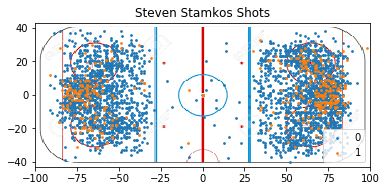

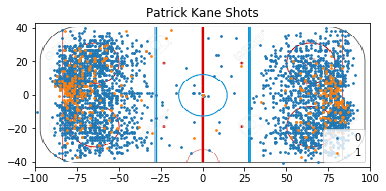

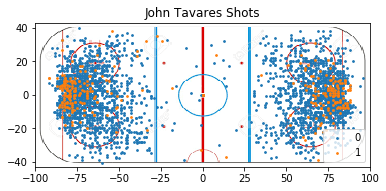

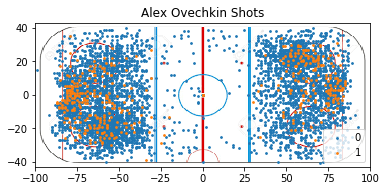

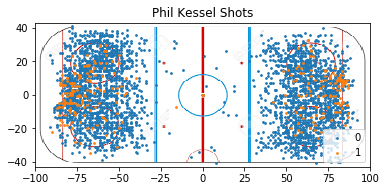

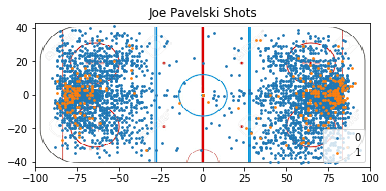

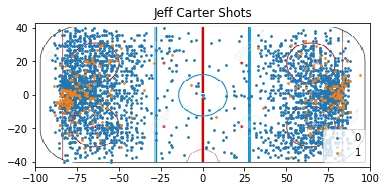

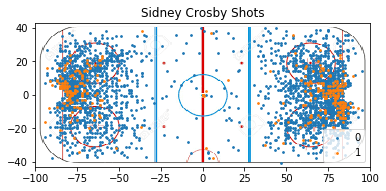

In [243]:
stamkos=shots_df[shots_df['p1_name']=='STEVEN STAMKOS']
x_coords = stamkos['xC']
y_coords = stamkos['yC']
groups = stamkos.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Steven Stamkos Shots')
plt.show()

kane=shots_df[shots_df['p1_name']=='PATRICK KANE']
x_coords = kane['xC']
y_coords = kane['yC']
groups = kane.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Patrick Kane Shots')
plt.show()


tavares=shots_df[shots_df['p1_name']=='JOHN TAVARES']
x_coords = tavares['xC']
y_coords = tavares['yC']
groups = tavares.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('John Tavares Shots')
plt.show()


ovechkin=shots_df[shots_df['p1_name']=='ALEX OVECHKIN']
x_coords = ovechkin['xC']
y_coords = ovechkin['yC']
groups = ovechkin.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"], group["yC"],label=name,s=3)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Alex Ovechkin Shots')
plt.show()


kessel=shots_df[shots_df['p1_name']=='PHIL KESSEL']
x_coords = kessel['xC']
y_coords = kessel['yC']
groups = kessel.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"],group["yC"],label=name,s=3,cmap=plt.cm.coolwarm)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Phil Kessel Shots')
plt.show()

pavelski=shots_df[shots_df['p1_name']=='JOE PAVELSKI']
x_coords = pavelski['xC']
y_coords = pavelski['yC']
groups = pavelski.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"],group["yC"],label=name,s=3,cmap=plt.cm.coolwarm)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Joe Pavelski Shots')
plt.show()


carter=shots_df[shots_df['p1_name']=='JEFF CARTER']
x_coords = carter['xC']
y_coords = carter['yC']
groups = carter.groupby('Shot_Success')

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"],group["yC"],label=name,s=3,cmap=plt.cm.coolwarm)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Jeff Carter Shots')
plt.show()

crosby=shots_df[shots_df['p1_name']=='SIDNEY CROSBY']
x_coords = crosby['xC']
y_coords = crosby['yC']
#groups = crosby.groupby('Shot_Success')
groups = crosby['Shot_Success' == 1]

img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
for name, group in groups:
    plt.scatter(group["xC"],group["yC"],label=name,s=3,cmap=plt.cm.coolwarm)
plt.legend(loc=4)
#plt.scatter(x_coords, y_coords,s=1,c=cdict,label=Shot_Success)
plt.title('Sidney Crosby Shots')
plt.show()

what sets Ovechkin apart? good shot quality or good setup? or luck?


#top goal scorers, left hand

In [182]:
most_goals_wing_side = shots_df.groupby(['Wing_Side'])['Shot_Success'].sum().sort_values(ascending=False)
most_goals_wing_side

Wing_Side
Left Wing     35490
Right Wing    30056
Name: Shot_Success, dtype: int64

In [184]:
most_goals_wing_side_yr = shots_df.groupby(['Year','Wing_Side'])['Shot_Success'].sum().sort_values(ascending=False)
most_goals_wing_side_yr

## looks like it hasn't evolved over time; most of goals scored from
#left side ###

Year  Wing_Side 
2009  Left Wing     4439
2018  Left Wing     4375
2017  Left Wing     4365
2010  Left Wing     4110
2016  Left Wing     4016
2011  Left Wing     3972
2014  Left Wing     3962
2018  Right Wing    3856
2015  Left Wing     3840
2017  Right Wing    3802
2010  Right Wing    3434
2014  Right Wing    3412
2015  Right Wing    3411
2011  Right Wing    3395
2016  Right Wing    3361
2009  Right Wing    3338
2012  Left Wing     2411
      Right Wing    2047
Name: Shot_Success, dtype: int64

In [183]:
most_goals_prev_wing_side = shots_df.groupby(['prev_Wing_Side'])['Shot_Success'].sum().sort_values(ascending=False)
most_goals_prev_wing_side

prev_Wing_Side
Left Wing     34823
Right Wing    30723
Name: Shot_Success, dtype: int64

# Feature Engineering of Variables

In [297]:
#### feature engineering of categorical variables ####
#shots_df['FivexFive_Strength'] = np.where(shots_df['Strength']=='5x5', 1, 0)
#shots_df['FivexFour_Strength'] = np.where(shots_df['Strength']=='5x4', 1, 0)
#shots_df['FivexThree_Strength'] = np.where(shots_df['Strength']=='5x3', 1, 0)
#shots_df['FourxFive_Strength'] = np.where(shots_df['Strength']=='4x5', 1, 0)
#shots_df['FourxFour_Strength'] = np.where(shots_df['Strength']=='4x4', 1, 0)
#shots_df['FourxThree_Strength'] = np.where(shots_df['Strength']=='4x3', 1, 0)
#shots_df['ThreexFive_Strength'] = np.where(shots_df['Strength']=='3x5', 1, 0)
#shots_df['ThreexFour_Strength'] = np.where(shots_df['Strength']=='3x4', 1, 0)
#shots_df['ThreexThree_Strength'] = np.where(shots_df['Strength']=='3x3', 1, 0)

shots_df['Even_Strength'] = np.where(shots_df.Strength.isin(even_strength), 1, 0)
shots_df['Power_Play'] = np.where(shots_df.Strength.isin(power_play), 1, 0)
shots_df['Deficit_Play'] = np.where(shots_df.Strength.isin(deficit), 1, 0)
shots_df['Penalty_Play'] = np.where(shots_df.Strength.isin(penalty_sht), 1, 0)






#shots_df['Strength'] = pd.Categorical(shots_df.Strength)
#shots_df['Strength_type'] = shots_df.Strength.cat.codes

In [298]:
shots_df.dtypes

Unnamed: 0               int64
Game_Id                  int64
Date                    object
Period                   int64
Event                   object
                         ...  
Right_prev_Wing_Side     int64
Even_Strength            int64
Power_Play               int64
Deficit_Play             int64
Penalty_Play             int64
Length: 108, dtype: object

In [299]:
#shots_df['Type'] = pd.Categorical(shots_df.Type)
#shots_df['Shot_type'] = shots_df.Type.cat.codes

shots_df['Backhand_Type'] = np.where(shots_df['Type']=='BACKHAND', 1, 0)
shots_df['Deflected_Type'] = np.where(shots_df['Type']=='DEFLECTED', 1, 0)
shots_df['Slapshot_Type'] = np.where(shots_df['Type']=='SLAP SHOT', 1, 0)
shots_df['Snapshot_Type'] = np.where(shots_df['Type']=='SNAP SHOT', 1, 0)
shots_df['TipIn_Type'] = np.where(shots_df['Type']=='TIP-IN', 1, 0)
shots_df['WrapAround_Type'] = np.where(shots_df['Type']=='WRAP-AROUND', 1, 0)
shots_df['WristShot_Type'] = np.where(shots_df['Type']=='WRIST SHOT', 1, 0)

In [300]:
#shots_df['prev_event'] = pd.Categorical(shots_df.prev_event)
#shots_df['prev_event_type'] = shots_df.prev_event.cat.codes

shots_df['BLOCK_prev_event'] = np.where(shots_df['prev_event']=='BLOCK', 1, 0)
shots_df['EISTR_prev_event'] = np.where(shots_df['prev_event']=='EISTR', 1, 0)
shots_df['FAC_prev_event'] = np.where(shots_df['prev_event']=='FAC', 1, 0)
shots_df['GEND_prev_event'] = np.where(shots_df['prev_event']=='GEND', 1, 0)
shots_df['GIVE_prev_event'] = np.where(shots_df['prev_event']=='GIVE', 1, 0)
shots_df['GOAL_prev_event'] = np.where(shots_df['prev_event']=='GOAL', 1, 0)
shots_df['HIT_prev_event'] = np.where(shots_df['prev_event']=='HIT', 1, 0)
shots_df['MISS_prev_event'] = np.where(shots_df['prev_event']=='MISS', 1, 0)
shots_df['PEND_prev_event'] = np.where(shots_df['prev_event']=='PEND', 1, 0)
shots_df['PENL_prev_event'] = np.where(shots_df['prev_event']=='PENL', 1, 0)
shots_df['PSTR_prev_event'] = np.where(shots_df['prev_event']=='PSTR', 1, 0)
shots_df['SHOT_prev_event'] = np.where(shots_df['prev_event']=='SHOT', 1, 0)
shots_df['STOP_prev_event'] = np.where(shots_df['prev_event']=='STOP', 1, 0)
shots_df['TAKE_prev_event'] = np.where(shots_df['prev_event']=='TAKE', 1, 0)

In [301]:
#shots_df['Wing_Side'] = pd.Categorical(shots_df.Wing_Side)
#shots_df['Wing_Side_type'] = shots_df.Wing_Side.cat.codes
shots_df['Left_Wing_Side'] = np.where(shots_df['Wing_Side']=='Left Wing', 1, 0)
shots_df['Right_Wing_Side'] = np.where(shots_df['Wing_Side']=='Right Wing', 1, 0)

In [302]:
#shots_df['prev_Wing_Side'] = pd.Categorical(shots_df.prev_Wing_Side)
#shots_df['prev_Wing_Side_type'] = shots_df.prev_Wing_Side.cat.codes

shots_df['Left_prev_Wing_Side'] = np.where(shots_df['prev_Wing_Side']=='Left Wing', 1, 0)
shots_df['Right_prev_Wing_Side'] = np.where(shots_df['prev_Wing_Side']=='Right Wing', 1, 0)

In [303]:
#shots_df.groupby('prev_Wing_Side').count()
#shots_df.columns
shots_df['Shot_Angle'] = shots_df['Shot_Angle'].dropna()

In [304]:
shots_df['Shot_Angle'] = shots_df['Shot_Angle'].fillna(0)

In [305]:
shots_df['prev_Angle_to_net'] = shots_df['prev_Angle_to_net'].dropna()

In [306]:
shots_df['prev_Angle_to_net'] = shots_df['prev_Angle_to_net'].fillna(0)

In [307]:
shots_df['xC'] = shots_df['xC'].dropna()

In [308]:
shots_df['xC'] = shots_df['xC'].fillna(0)

In [309]:
shots_df['yC'] = shots_df['yC'].dropna()

In [310]:
shots_df['yC'] = shots_df['yC'].fillna(0)

In [311]:
prelim_model_data = np.array([shots_df.Shot_Success,\
    shots_df.Seconds_Elapsed,\
    shots_df.Distance,\
    shots_df.Shot_Angle,\
    shots_df.Seconds_since_prev_event,\
    shots_df.prev_Distance,\
    shots_df.prev_Angle_to_net,\
    shots_df.Even_Strength,\
    shots_df.Power_Play,\
    shots_df.Deficit_Play,\
    shots_df.Penalty_Play,\
    shots_df.Backhand_Type,\
    shots_df.Deflected_Type,\
    shots_df.Slapshot_Type,\
    shots_df.Snapshot_Type,\
    shots_df.TipIn_Type,\
    shots_df.WrapAround_Type,\
    shots_df.WristShot_Type,\
    shots_df.BLOCK_prev_event,\
    shots_df.EISTR_prev_event,\
    shots_df.FAC_prev_event,\
    shots_df.GEND_prev_event,\
    shots_df.GIVE_prev_event,\
    shots_df.GOAL_prev_event,\
    shots_df.HIT_prev_event,\
    shots_df.MISS_prev_event,\
    shots_df.PEND_prev_event,\
    shots_df.PENL_prev_event,\
    shots_df.PSTR_prev_event,\
    shots_df.SHOT_prev_event,\
    shots_df.STOP_prev_event,\
    shots_df.TAKE_prev_event,\
    shots_df.Left_Wing_Side,\
    shots_df.Right_Wing_Side,\
    shots_df.Left_prev_Wing_Side,\
    shots_df.Right_prev_Wing_Side,\
    shots_df.xC,\
    shots_df.yC,\
    shots_df.Year,\
    shots_df.p1_ID]).T

# Model Fitting

In [319]:
X = prelim_model_data[:,1:36] #changed to 1 until end, also changed from prelim_model to model
#X
y = prelim_model_data[:,0] #first column is responses, also changed from prelim_model to model
y=y.astype('int')
#y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

Since we are working with binomial distribution, typical regression models won't work in predicting goal success. We will need to add logistic regression, random forests to our set of options to predict goal accuracy. 

In [320]:
dtree3 = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_SEED)
dtree5 = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
dtree10 = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
rf50 = RandomForestClassifier(n_estimators = 50, random_state=RANDOM_SEED)
rf100 = RandomForestClassifier(n_estimators = 100, random_state=RANDOM_SEED)
rf250 = RandomForestClassifier(n_estimators = 250, random_state=RANDOM_SEED)
rf500 = RandomForestClassifier(n_estimators = 500,  random_state=RANDOM_SEED)
sgd = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=RANDOM_SEED)
sgd_en = SGDClassifier(loss="log",penalty='elasticnet',alpha=0.0001)
logit = LogisticRegression(random_state=RANDOM_SEED)
#set up function to perform modeling
fullSummary = pd.DataFrame()

def treeModels(modelName, X_test, y_train, y_test):
    modelName.fit(X_train, y_train)
    y_pred = modelName.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    testScore = modelName.score(X_test, y_test)
    trainScore = modelName.score(X_train, y_train)
    #mod_prob = modelName.predict_proba(X_test)
    #mod_prob = mod_prob[:, 1]
    #mod_auc = roc_auc_score(y_test, mod_prob)
    #mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_prob)
    
    #summary = pd.DataFrame({'Model':modelName, 'MSE':mse, 'RMSE':rmse, 'Test Score':testScore, 'Train Score':trainScore, 'Intercept':intercept})
    
    if modelName == dtree3: print('Decision Tree depth 3:')
    elif modelName == dtree5: print('Decision Tree depth 5:')
    elif modelName == dtree10: print('Decision Tree depth 10:')
    elif modelName == rf50: print('Random Forest estimator 50:')
    elif modelName == rf100: print('Random Forest estimator 100:')
    elif modelName == rf250: print('Random Forest estimator 250:')
    elif modelName == rf500: print('Random Forest estimator 500:')
    elif modelName == sgd: print('Stochastic Gradient Descent:')
    elif modelName == sgd_en: print('Elastic Net:')
    elif modelName == logit: print('Logistic Regression:')
    else: return
    
    print('Mean Square Error: {:.5f}'.format(mse))
    print('Root Mean Square Error: {:.5f}'.format(rmse))
    print('Test Score: {:.5f}'.format(testScore))
    print('Train Score: {:.5f}'.format(trainScore))
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    
    #plt.plot(mod_fpr, mod_tpr, marker='.', label='Model ROC Curve')
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.show()
    
    return round(mse, 5), round(rmse, 5), round(testScore, 5), round(trainScore, 5)


Decision Tree depth 3:
Mean Square Error: 0.05089
Root Mean Square Error: 0.22559
Test Score: 0.94911
Train Score: 0.94971


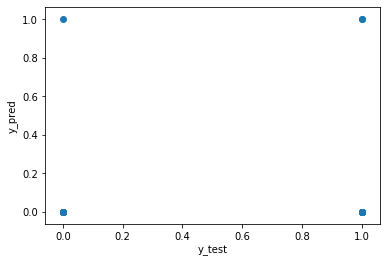

In [321]:
mse, rmse, testScore, trainScore = treeModels(dtree3, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 3', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 5:
Mean Square Error: 0.05089
Root Mean Square Error: 0.22559
Test Score: 0.94911
Train Score: 0.94972


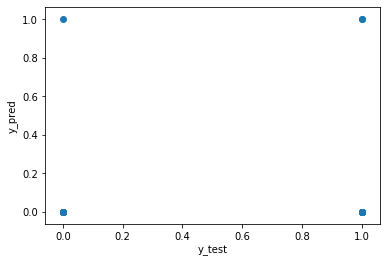

In [322]:
mse, rmse, testScore, trainScore = treeModels(dtree5, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 5', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Decision Tree depth 10:
Mean Square Error: 0.05115
Root Mean Square Error: 0.22617
Test Score: 0.94885
Train Score: 0.95003


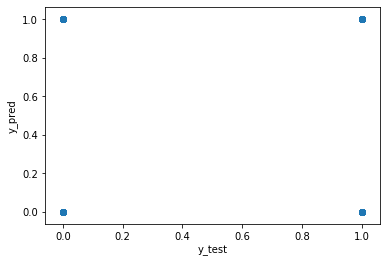

In [323]:
mse, rmse, testScore, trainScore = treeModels(dtree10, X_test, y_train, y_test)
summary = pd.DataFrame(['Decision Tree depth 10', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 50:
Mean Square Error: 0.05229
Root Mean Square Error: 0.22867
Test Score: 0.94771
Train Score: 0.99867


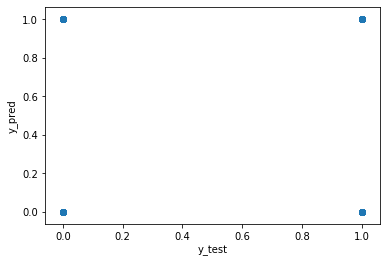

In [324]:
mse, rmse, testScore, trainScore = treeModels(rf50, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 50', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 100:
Mean Square Error: 0.05223
Root Mean Square Error: 0.22853
Test Score: 0.94777
Train Score: 0.99942


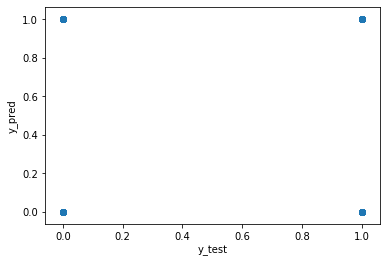

In [325]:
mse, rmse, testScore, trainScore = treeModels(rf100, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 100', mse, rmse, testScore, trainScore,0])
fullSummary = fullSummary.append(summary.T)

Random Forest estimator 250:
Mean Square Error: 0.05223
Root Mean Square Error: 0.22854
Test Score: 0.94777
Train Score: 0.99949


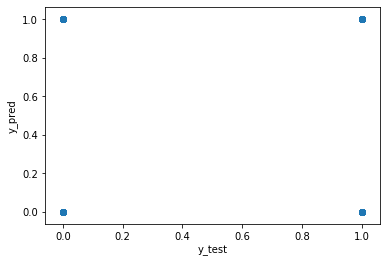

In [326]:
mse, rmse, testScore, trainScore = treeModels(rf250, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 250', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [ ]:
mse, rmse, testScore, trainScore = treeModels(rf500, X_test, y_train, y_test)
summary = pd.DataFrame(['Random Forest estimator 500', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [ ]:
mse, rmse, testScore, trainScore = treeModels(sgd, X_test, y_train, y_test)
summary = pd.DataFrame(['Stochastic Gradient Descent', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [ ]:
mse, rmse, testScore, trainScore = treeModels(sgd_en, X_test, y_train, y_test)
summary = pd.DataFrame(['Elastic Net Classifier', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [ ]:
mse, rmse, testScore, trainScore = treeModels(logit, X_test, y_train, y_test)
summary = pd.DataFrame(['Logistic Regression', mse, rmse, testScore, trainScore, 0])
fullSummary = fullSummary.append(summary.T)

In [ ]:
fullSummary.rename(columns = {0: 'Model', 1: 'MSE', 2: 'RMSE', 3: 'Test Score', 4: 'Train Score',  5: 'Intercept'}, inplace = True)
fullSummary.drop(columns=['Intercept'], inplace = True)
fullSummary

In [251]:
prelim_model_data2 = prelim_model_data

In [252]:
#prelim_model_data2 = pd.DataFrame(data=prelim_model_data2)
#pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])

In [253]:
#prelim_model_data2["prob"] = logit.predict_proba(prelim_model_data2[:,1:41])[:,[0]]

In [257]:
prob = logit.predict_proba(prelim_model_data2[:,1:41])[:,[0]]

In [258]:
prob

array([[0.97995685],
       [0.96886966],
       [0.985222  ],
       ...,
       [0.98268785],
       [0.9680103 ],
       [0.88131371]])

In [259]:
prelim_model_data2 = np.concatenate((prelim_model_data2, prob), axis=1)

In [260]:
prelim_model_data2.shape

(1300011, 46)

In [264]:
prelim_model_data2 = pd.DataFrame(data=prelim_model_data2)

In [ ]:
prelim_model_data2.columns =['Shot_Success','Seconds_Elapsed','Distance','Shot_Angle','Seconds_since_prev_event',\
                            'prev_Distance','prev_Angle_to_net','FivexFive_Strength']  

In [ ]:
    shots_df.prev_Distance,\
    shots_df.prev_Angle_to_net,\
    shots_df.FivexFive_Strength,\
    shots_df.FivexFour_Strength,\
    shots_df.FivexThree_Strength,\
    shots_df.FourxFive_Strength,\
    shots_df.FourxFour_Strength,\
    shots_df.FourxThree_Strength,\
    shots_df.ThreexFive_Strength,\
    shots_df.ThreexFour_Strength,\
    shots_df.ThreexThree_Strength,\
    shots_df.Backhand_Type,\
    shots_df.Deflected_Type,\
    shots_df.Slapshot_Type,\
    shots_df.Snapshot_Type,\
    shots_df.TipIn_Type,\
    shots_df.WrapAround_Type,\
    shots_df.WristShot_Type,\
    shots_df.BLOCK_prev_event,\
    shots_df.EISTR_prev_event,\
    shots_df.FAC_prev_event,\
    shots_df.GEND_prev_event,\
    shots_df.GIVE_prev_event,\
    shots_df.GOAL_prev_event,\
    shots_df.HIT_prev_event,\
    shots_df.MISS_prev_event,\
    shots_df.PEND_prev_event,\
    shots_df.PENL_prev_event,\
    shots_df.PSTR_prev_event,\
    shots_df.SHOT_prev_event,\
    shots_df.STOP_prev_event,\
    shots_df.TAKE_prev_event,\
    shots_df.Left_Wing_Side,\
    shots_df.Right_Wing_Side,\
    shots_df.Left_prev_Wing_Side,\
    shots_df.Right_prev_Wing_Side,\
    shots_df.xC,\
    shots_df.yC,\
    shots_df.Year,\
    shots_df.p1_ID]).T

In [ ]:
prelim_model_data2['Shot_Scoring_Rng'] = pr

No handles with labels found to put in legend.


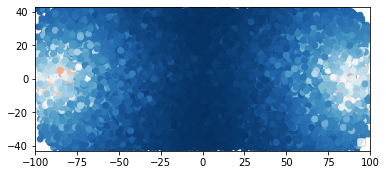

In [263]:
#### join onto dataset and subset for predicted variables so that we can filter the dataset # 

#### #need to fix color shade 


x_coords = prelim_model_data2[:,41]
y_coords = prelim_model_data2[:,42]
img = plt.imread("rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[-100, 100, -43, 43])
plt.scatter(x_coords, y_coords, c=prelim_model_data2[:,45], cmap=plt.cm.RdBu)
plt.axis([-100, 100, -43, 43])
plt.legend(loc=4)
plt.show()

#prob.T[0]

In [121]:
#scaler = StandardScaler()

# Add Shifts to Data

In [ ]:
shot_shift_df.columns

In [ ]:
game_ex1 = shift_df[['Game_Id','Player_Id','Start','End','Shift_Count','Year']]

In [ ]:
### players Plus/minus ratings based on play by play data
## pace of play; movement of position based on events ###

#calculate power play goals, faceoffs led to goal
#avg time on ice, avg shifts per game to goals score
#average shots per shift_percentage

In [ ]:
# well known Hockey metrics:
#Points Allocation (PA)
#Goals versus threshold (GVT)
#Player contributions (PC)
#DeltaSOT
#Point shares
#Total hockey roating (THoR)
#dCorsi 
#WAR